<a href="https://colab.research.google.com/github/pavan-kumar96/Coursera-capstone-project/blob/master/Happy_monk_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on iris dataset using Neural networks

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

# importing the data
from sklearn import datasets


In [143]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

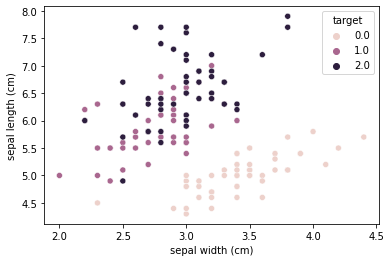

In [144]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.columns

sns.scatterplot(x = "sepal width (cm)", y = "sepal length (cm)", hue = "target", data=data1)

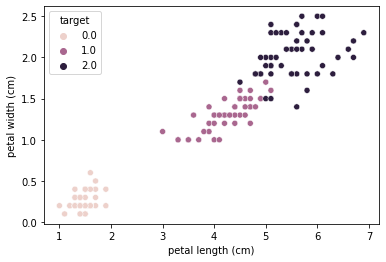

In [145]:
sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)",hue = "target", data = data1)

# 2. preparing the data

In [146]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

In [147]:
# Dataset will be prepared by the tensorflow from_tensor_slice() method.

X_train, X_test, y_train, y_test = train_test_split(x, y_label, test_size=0.3)

In [148]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
# print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)


In [149]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
     
    ])
    
    return model

In [150]:
model = get_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 3003      
Total params: 8,003
Trainable params: 8,003
Non-trainable params: 0
_________________________________________________________________


In [151]:

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [152]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 1s 71ms/step - loss: 1.1346 - accuracy: 0.2712 - val_loss: 1.0281 - val_accuracy: 0.2222
Epoch 2/30
4/4 [==============================] - 0s 18ms/step - loss: 0.9083 - accuracy: 0.4273 - val_loss: 0.8982 - val_accuracy: 0.6000
Epoch 3/30
4/4 [==============================] - 0s 17ms/step - loss: 0.7787 - accuracy: 0.6854 - val_loss: 0.7392 - val_accuracy: 0.6444
Epoch 4/30
4/4 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.7547 - val_loss: 0.6625 - val_accuracy: 0.6889
Epoch 5/30
4/4 [==============================] - 0s 19ms/step - loss: 0.6186 - accuracy: 0.7343 - val_loss: 0.6694 - val_accuracy: 0.6000
Epoch 6/30
4/4 [==============================] - 0s 18ms/step - loss: 0.6266 - accuracy: 0.6437 - val_loss: 0.5747 - val_accuracy: 0.6667
Epoch 7/30
4/4 [==============================] - 0s 19ms/step - loss: 0.5501 - accuracy: 0.7419 - val_loss: 0.5220 - val_accuracy: 0.8444
Epoch 8/30
4/4 [===========

In [153]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9778


[0.22159495949745178, 0.9777777791023254]

In [154]:
pred = model.predict(X_test)

# Performance Monitor


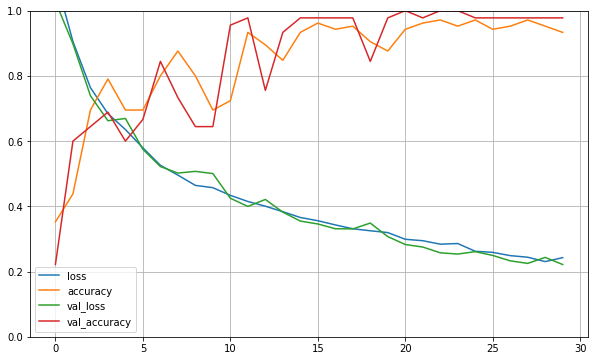

In [155]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Confusion matrix

In [156]:

y_pred = np.argmax(pred, axis=1)


In [157]:
y_test = np.argmax(y_test, axis = 1)

## **Accuracy distribution for each epoch for train and test data **

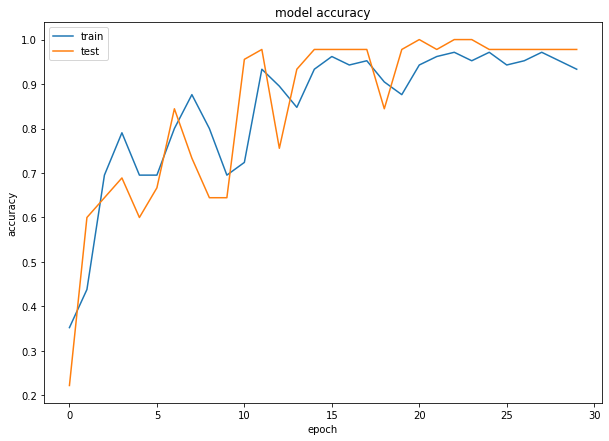

In [158]:
# summarize history for accuracy
plt.figure(figsize= (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model loss distribution for each epoch for both train and test data

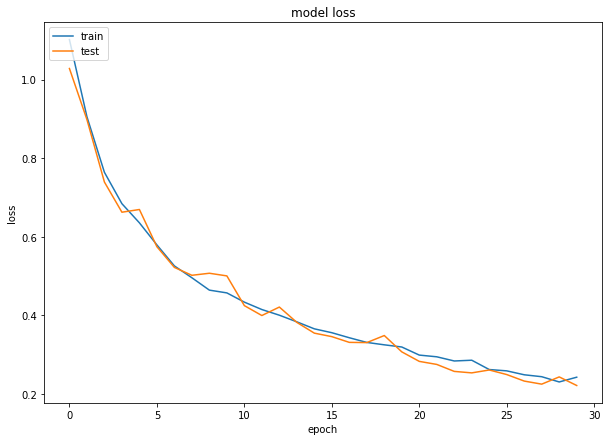

In [159]:

# summarize history for loss
plt.figure(figsize= (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [160]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 10]])

Text(69.0, 0.5, 'Truth')

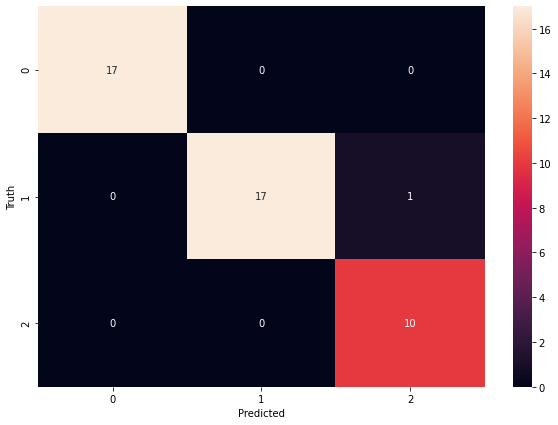

In [161]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        18
           2       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



# Technical Report on the data:

Task : **Given a data of different types of iris flower and target is to predict the each row of data belongs to which category of the iris flower**

**Steps for the predcitions: **

1. importing the data from the keras **library**
2. Preprocessed the data  i.e converted the catagorical variable into numerical varible for processing
4. Getting the info about the data. Like distribution of data, count of data points, type of data variables, no. features etc..
5. Diferentiating the feature and target variable
6. Converted them into traning and testing data set with 30% as testing data and 70% as testing data.
7. Defining the Neural network model with only one hidden layer with "activation function as **Relu** " and one input layer specifing the input size of the model and one output layer with **softmax** function specifying the no. of categories that the model should predict.
8. defined the "adam" optimizer with loss funtion as **categoricalcrossEntropy** and metrics as **accuracy**
9. Fitted the model with above specifications and **Epochs** as 30.
10. Predicted the model which got as probabilites and converted them to category by argmax function.
11. Evaluated the model for test data and got a **Accuracy of 98%**
12. Ploted  the **Confusion matrix** for comparing  distrbution of predicted vs actual data
13. **Ploted a train and test loss with respect to each epoch**
14.  **Ploted a train and test accuracy with respect to each epoch**
15. **Classification matrix on the predicted and actual data**
